In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [50]:
def imshow(img):
    plt.figure(figsize=(10, 7))
    plt.imshow(img[:,:,::-1])


In [15]:
img = cv2.imread('img/noisy.png')

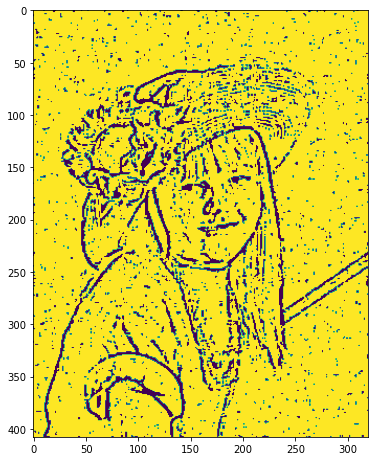

In [41]:
copy1 = img.copy()

def sketch_image(img):
    """Sketches the image applying a laplacian operator to detect the edges"""

    # Convert to gray scale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply median filter
    img_gray = cv2.medianBlur(img_gray, 5)

    # Detect edges using cv2.Laplacian()
    edges = cv2.Laplacian(img_gray, cv2.CV_8U, ksize=5)

    # Threshold the edges image:
    ret, thresholded = cv2.threshold(edges, 230, 255, cv2.THRESH_BINARY_INV)

    return thresholded

res = sketch_image(copy1)
res.shape
plt.figure(figsize=(6, 12))
plt.imshow(res)

In [31]:
np.ones((1,3), dtype='float') * 110

array([[110., 110., 110.]])

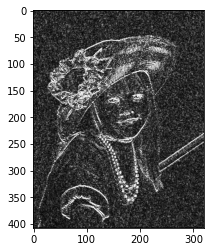

In [59]:
copy2 = img.copy()
copy2 = cv2.cvtColor(copy2, cv2.COLOR_BGR2GRAY)
gradient_x = cv2.Sobel(copy2, cv2.CV_16S, 1, 0, 3)
gradient_y = cv2.Sobel(copy2, cv2.CV_16S, 0, 1, 3)

# Conversion to an unsigned 8-bit type:
abs_gradient_x = cv2.convertScaleAbs(gradient_x)
abs_gradient_y = cv2.convertScaleAbs(gradient_y)

sobel = cv2.addWeighted(abs_gradient_x, 0.1, abs_gradient_y, 0.9, 0)
plt.imshow(sobel, cmap='gray')